In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as pp
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

In [187]:
df = pd.read_csv('./Covid Dataset.csv')
df.shape

(5434, 21)

In [188]:
df.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,...,No,Yes,Yes,No,No,Yes,No,No,No,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,...,Yes,No,No,No,No,Yes,No,No,No,Yes


In [189]:
#pp.ProfileReport(df)

In [190]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [191]:
e=LabelEncoder()

In [192]:
cols = df.columns
cols

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [193]:
for i in cols:
    df[i] = e.fit_transform(df[i])

In [194]:
df.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


<AxesSubplot: >

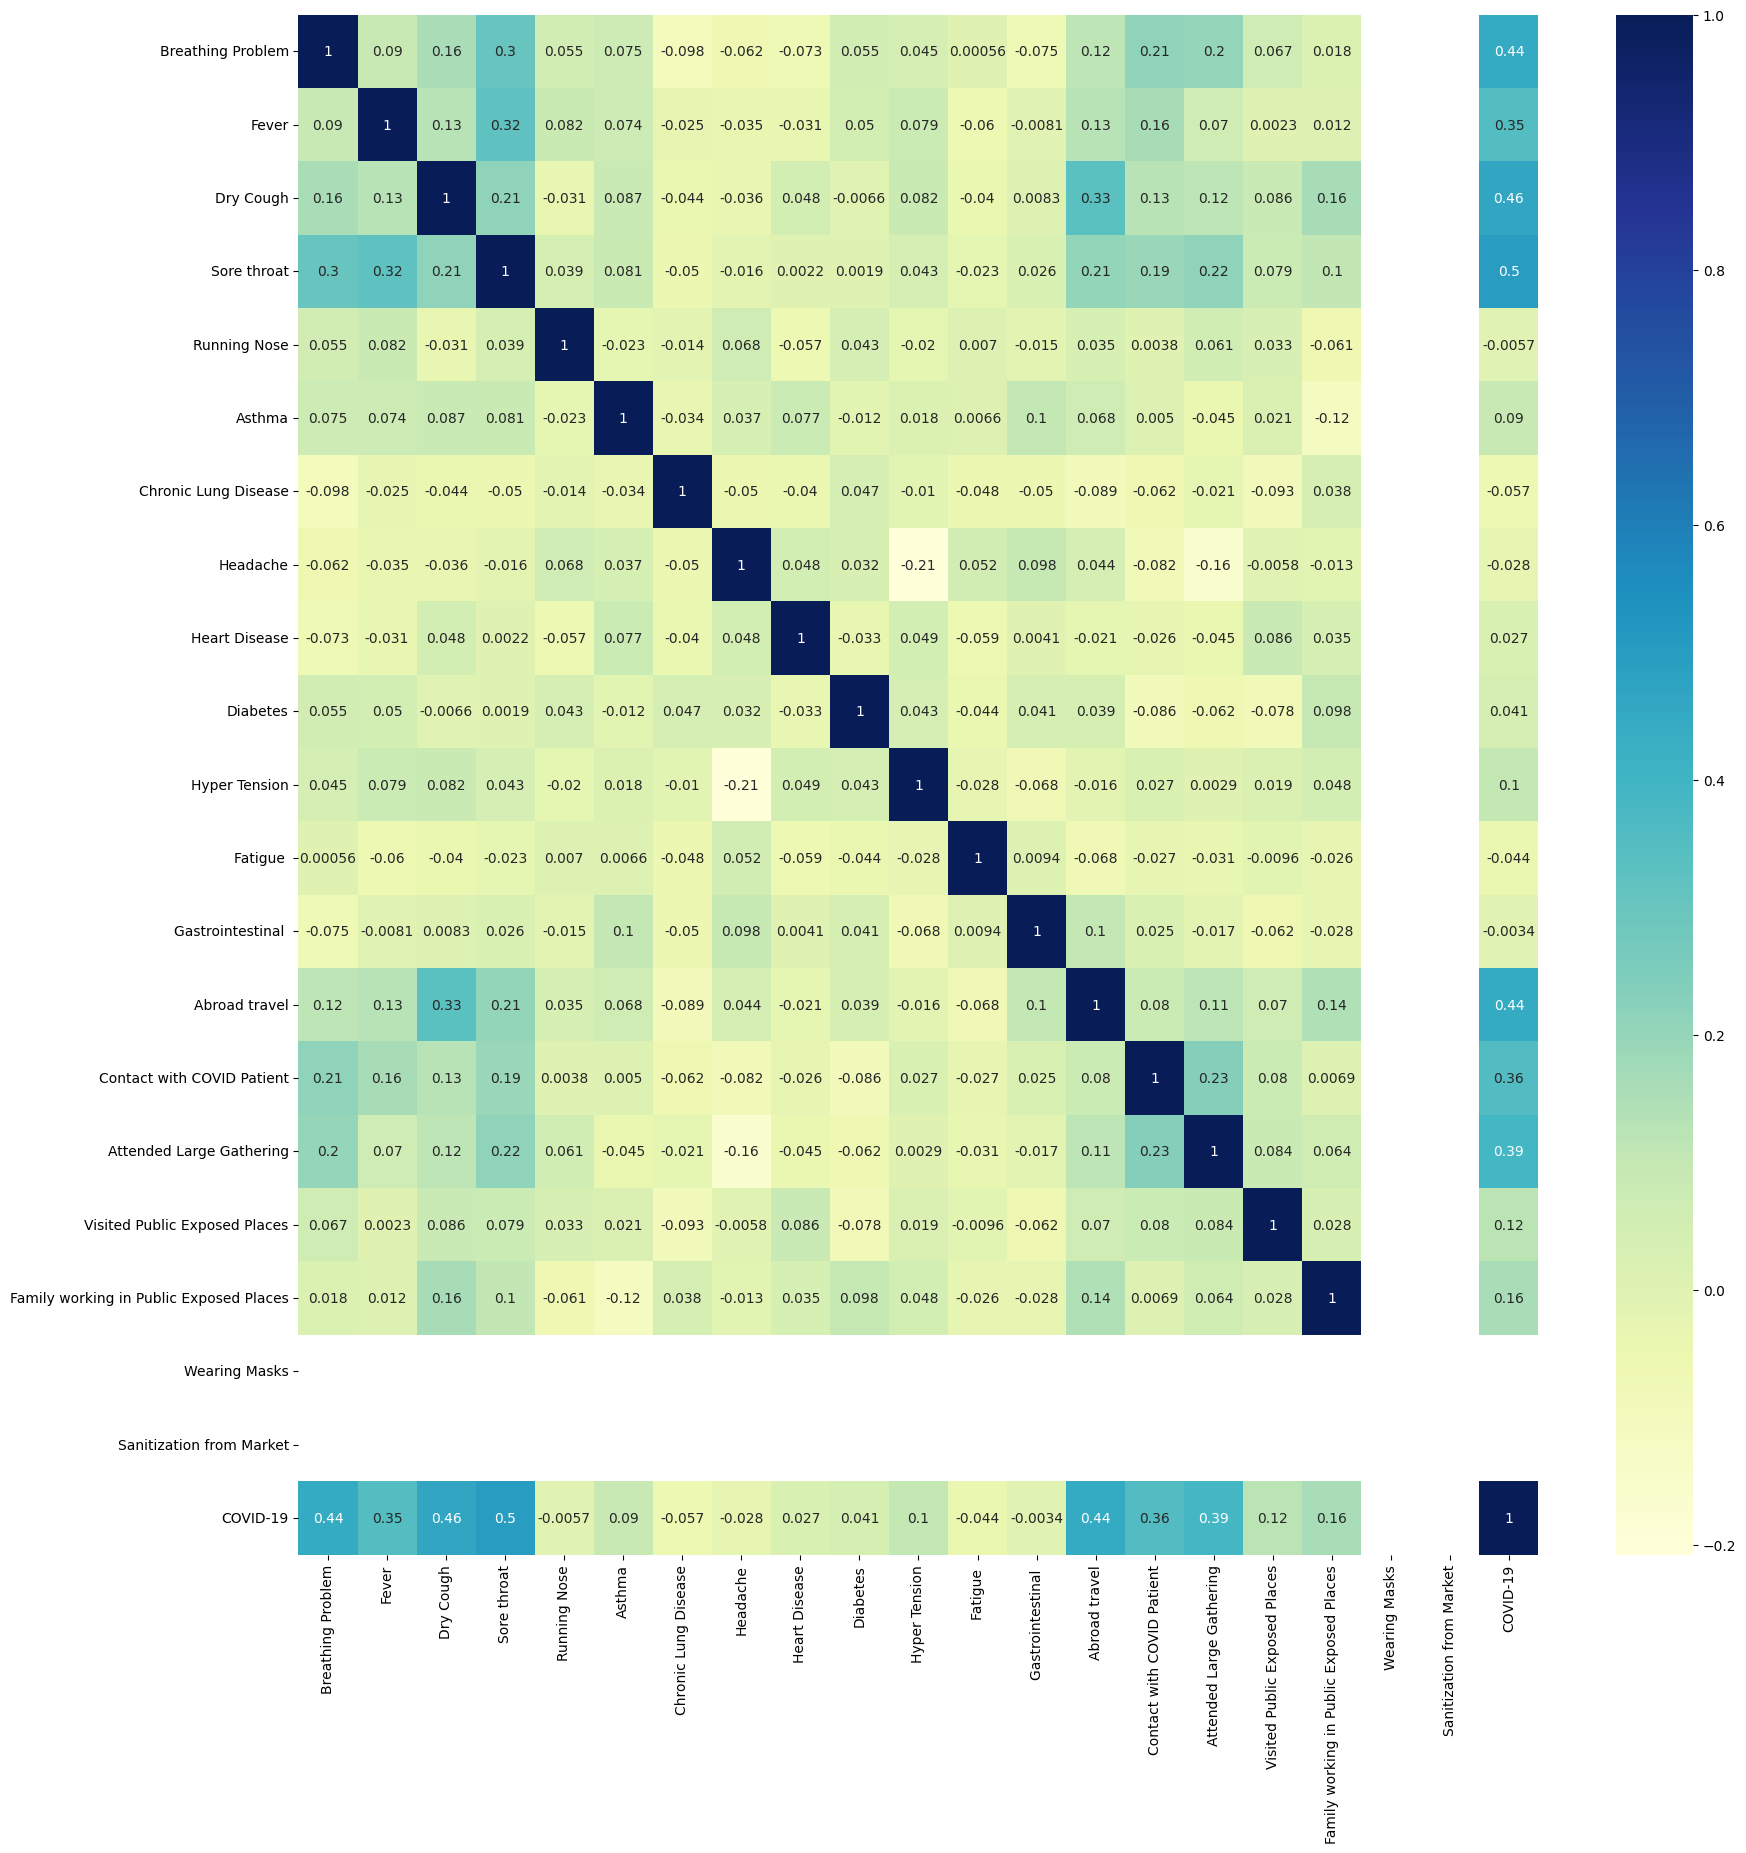

In [195]:
%matplotlib inline
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [196]:
df.drop_duplicates(inplace=True)
df.shape

(466, 21)

In [197]:
cols=['Chronic Lung Disease','Heart Disease','Asthma','Wearing Masks','Diabetes','Sanitization from Market']

In [198]:
df.drop(cols,axis=1,inplace=True)

In [199]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Headache', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [200]:
from sklearn.utils import resample
df['COVID-19'].value_counts()

1    385
0     81
Name: COVID-19, dtype: int64

In [201]:
minority = df[df['COVID-19']==0]
majority = df[df['COVID-19']==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (81, 15)
Majority size: (385, 15)


In [202]:
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (385, 15)


In [203]:
df = pd.concat([minority_upsample, majority], axis=0)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('COVID-19', axis=1), df['COVID-19'], test_size=0.25)

In [205]:
X_test

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
2055,0,1,1,1,0,1,0,0,1,1,0,0,1,1
2665,1,0,1,1,0,0,0,1,0,0,1,1,0,0
4546,0,1,1,0,0,1,1,0,1,0,0,0,1,0
5123,1,0,0,1,1,1,1,0,0,0,1,1,0,0
4093,0,0,0,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,1,1,1,1,1,1,1,1,1,0,1,0,0,0
4089,0,0,0,0,1,1,0,1,1,0,0,1,1,1
4089,0,0,0,0,1,1,0,1,1,0,0,1,1,1
3477,0,1,1,0,0,0,1,1,1,1,1,0,1,1


In [206]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[97  7]
 [ 5 84]]


Accuracy of Logistic Regression: 93.78238341968913 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       104
           1       0.92      0.94      0.93        89

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



In [207]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[104   0]
 [ 46  43]]


Accuracy of Naive Bayes model: 76.16580310880829 

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       104
           1       1.00      0.48      0.65        89

    accuracy                           0.76       193
   macro avg       0.85      0.74      0.74       193
weighted avg       0.83      0.76      0.74       193



In [208]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_jobs=-1,)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[102   2]
 [  3  86]]


Accuracy of Random Forest: 97.40932642487047 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       104
           1       0.98      0.97      0.97        89

    accuracy                           0.97       193
   macro avg       0.97      0.97      0.97       193
weighted avg       0.97      0.97      0.97       193



In [209]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[93 11]
 [ 8 81]]


Accuracy of Extreme Gradient Boost: 90.15544041450777 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       104
           1       0.88      0.91      0.90        89

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193



In [210]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[104   0]
 [ 12  77]]


Accuracy of K-NeighborsClassifier: 93.78238341968913 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       104
           1       1.00      0.87      0.93        89

    accuracy                           0.94       193
   macro avg       0.95      0.93      0.94       193
weighted avg       0.94      0.94      0.94       193



In [211]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[104   0]
 [  8  81]]


Accuracy of DecisionTreeClassifier: 95.85492227979275 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       104
           1       1.00      0.91      0.95        89

    accuracy                           0.96       193
   macro avg       0.96      0.96      0.96       193
weighted avg       0.96      0.96      0.96       193



In [212]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[102   2]
 [  7  82]]


Accuracy of Support Vector Classifier: 95.33678756476684 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.98      0.92      0.95        89

    accuracy                           0.95       193
   macro avg       0.96      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193



In [213]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,93.782383
1,Naive Bayes,76.165803
2,Random Forest,97.409326
3,Extreme Gradient Boost,90.155440
4,K-Nearest Neighbour,93.782383
5,Decision Tree,95.854922
6,Support Vector Machine,95.336788


In [218]:
scv=StackingCVClassifier(classifiers=[rf,dt,svc],meta_classifier= lr,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[102   2]
 [  2  87]]


Accuracy of StackingCVClassifier: 97.92746113989638 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.98      0.98      0.98        89

    accuracy                           0.98       193
   macro avg       0.98      0.98      0.98       193
weighted avg       0.98      0.98      0.98       193



In [219]:
filename = 'finalized_model.sav'
#joblib.dump(scv, filename)

['finalized_model.sav']

In [230]:
X_test

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
2055,0,1,1,1,0,1,0,0,1,1,0,0,1,1
2665,1,0,1,1,0,0,0,1,0,0,1,1,0,0
4546,0,1,1,0,0,1,1,0,1,0,0,0,1,0
5123,1,0,0,1,1,1,1,0,0,0,1,1,0,0
4093,0,0,0,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,1,1,1,1,1,1,1,1,1,0,1,0,0,0
4089,0,0,0,0,1,1,0,1,1,0,0,1,1,1
4089,0,0,0,0,1,1,0,1,1,0,0,1,1,1
3477,0,1,1,0,0,0,1,1,1,1,1,0,1,1


In [252]:
y_test

2055    1
2665    1
4546    0
5123    1
4093    0
       ..
5016    0
4089    0
4089    0
3477    1
91      1
Name: COVID-19, Length: 193, dtype: int32

In [271]:
data = [X_test.loc[5016].values]

In [272]:
classifier = joblib.load(filename)
prediction = classifier.predict(data)
print(prediction)
if(prediction[0]>0.5):
    prediction="YOU have Chances of disease"   
else:
    prediction="NO chances of getting disease"
print(prediction)

[0]
NO chances of getting disease


C:\Ana\envs\hospital_package\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Ana\envs\hospital_package\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Ana\envs\hospital_package\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [277]:
for i in X_test.columns:
    print(i,end=' = ')
    print('data[{}]'.format(i))
    print()

Breathing Problem = data[Breathing Problem]

Fever = data[Fever]

Dry Cough = data[Dry Cough]

Sore throat = data[Sore throat]

Running Nose = data[Running Nose]

Headache = data[Headache]

Hyper Tension = data[Hyper Tension]

Fatigue  = data[Fatigue ]

Gastrointestinal  = data[Gastrointestinal ]

Abroad travel = data[Abroad travel]

Contact with COVID Patient = data[Contact with COVID Patient]

Attended Large Gathering = data[Attended Large Gathering]

Visited Public Exposed Places = data[Visited Public Exposed Places]

Family working in Public Exposed Places = data[Family working in Public Exposed Places]

